In [1]:
import numpy as np
import pandas as pd
import os, operator
from datetime import datetime
from datetime import date
from tqdm import tqdm_notebook
from tqdm import tqdm
tqdm_notebook().pandas()

import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 300
pd.options.display.max_columns = 300

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.cluster import DBSCAN

A Jupyter Widget

In [2]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')
samp = pd.read_csv('sample.csv')

## Приведение данных к общему виду

In [3]:
for c in tqdm(['city', 'mcc', 'atm_address', 'pos_address', 'transaction_date', 'terminal_id', 'currency']):
    test[c] = test[c].apply(lambda x: str(x).lower())
    
for c in tqdm(['city', 'mcc', 'atm_address', 'pos_address', 'transaction_date', 'terminal_id', 'currency']):
    train[c] = train[c].apply(lambda x: str(x).lower())

train.mcc = train.mcc.apply(lambda x: x.replace(',', ''))
test.mcc = test.mcc.apply(lambda x: x.replace(',', ''))

train.transaction_date = pd.to_datetime(train.transaction_date)
test.transaction_date = pd.to_datetime(test.transaction_date)
train['dow'] = train.transaction_date.dt.dayofweek
test['dow'] = test.transaction_date.dt.dayofweek
train.transaction_date = train.transaction_date.dt.date
test.transaction_date = test.transaction_date.dt.date

train['hol'] = train.dow.apply(lambda x: int(x>4))
test['hol'] = test.dow.apply(lambda x: int(x>4))

dt = date(2017, 1, 1)
train['date_int'] = train.transaction_date - dt
test['date_int'] = test.transaction_date - dt
train['date_int'] =train['date_int'].apply(lambda x: x.days)
test['date_int'] =test['date_int'].apply(lambda x: x.days)

100%|██████████| 7/7 [00:02<00:00,  2.74it/s]


## Визуализация

In [87]:
from sklearn.cluster import DBSCAN
def plot(df, e, n):
    uniq_cust = train.customer_id.unique()
    s = np.random.choice(uniq_cust, size=1)[0]
    
    temp = train[train.customer_id == s]
    home = train[train.customer_id == s][['home_add_lat', 'home_add_lon']].values[0]
    work = train[train.customer_id == s][['work_add_lat', 'work_add_lon']].values[0]

    temp2 = pd.concat([temp[['atm_address_lat', 'atm_address_lon']].rename(columns={'atm_address_lat':'lat', 'atm_address_lon':'lon'}), \
                       temp[['pos_address_lat', 'pos_address_lon']].rename(columns={'pos_address_lat':'lat', 'pos_address_lon':'lon'})])
    
    temp2.dropna(inplace=True)
    
    clf = DBSCAN(eps = e, p=2, min_samples=n)
    temp2['out'] = clf.fit_predict(temp2[['lat', 'lon']].values)
    
    plt.figure(figsize=(10,10))
    colors = ['blue', 'green', 'red', 'violet', 'orange', 'brown', 'grey', 'yellow', 'magenta', 'cyan', 'pink', 'silver', 'gold', 'black', 'purple', 'olive','blue', 'green', 'red', 'violet', 'orange', 'brown', 'grey', 'yellow']
    
    print(temp2.out.max()+1)
    for c in range(temp2.out.max()+1):
        plt.scatter(temp2[temp2.out == c].lat, temp2[temp2.out == c].lon, c=colors[c], label = 'transactions')
    
#     plt.scatter(temp2[temp2.out == -1].lat, temp2[temp2.out == -1].lon, c='black')
    
    plt.scatter(home[0], home[1], c='cyan', marker='x', label='home')
    plt.scatter(work[0], work[1], c='pink', marker='x', label='work')
    plt.legend(fontsize=12)
    plt.title('customer '+s)

[44.729 37.741] [44.718 37.585]


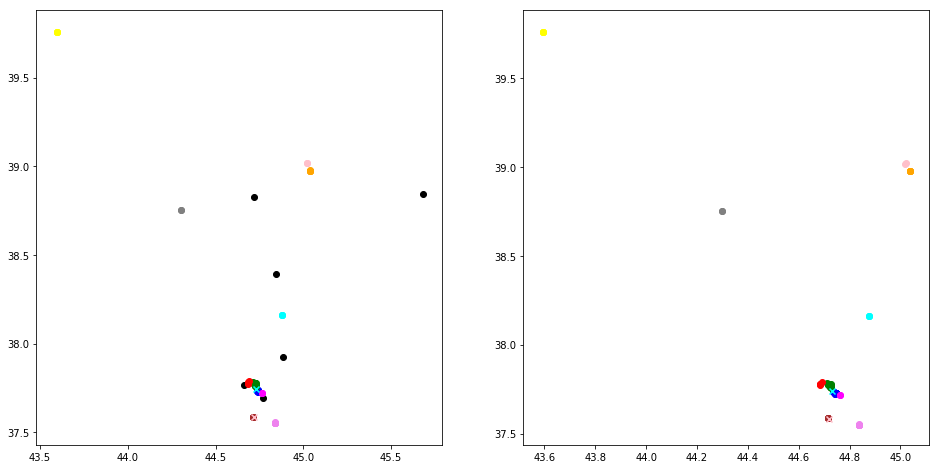

In [92]:
plot('a963d23dedd26b0e10a1bb9d347670ea')

In [2]:
# uniq_cust = test.customer_id.unique()
# os.chdir('/home/lenny/Documents/Python Scripts/Raiff/test_validation/customers')
# for u in tqdm_notebook(uniq_cust):
#     test[test.customer_id == u].to_csv(u+'.csv', index=False)

# uniq_cust = train.customer_id.unique()
# os.chdir('/home/lenny/Documents/Python Scripts/Raiff/test_validation/train_customers')
# for u in tqdm_notebook(uniq_cust):
#     train[train.customer_id == u].to_csv(u+'.csv', index=False)

In [165]:
cols = ['num','d1','d2','d3','d4','d5','d6','d7','term','mcc_num','is_hol','lat_std','lon_std','std','num_cl','lat_med','lon_med',\
        'amount','amount_2','amount_p1','amount_p2','amount_p3',\
        'date_long', 'date_med', 'date_std', 'date_win', 'date_spr', 'date_sum', 'date_aut']
l = []
for i in mcc_list:
    l.append(i+'_num')
    l.append(i+'_hol')
cols = cols + l  
l = ['cl_lat_std','cl_lon_std','cl_std','cl_num','cl_lat_med','cl_lon_med','cl_is_hol',\
        'cl_amount', 'cl_amount_2', 'cl_amount_p1','cl_amount_p2','cl_amount_p3','cl_date_max',\
        'cl_date_long', 'cl_date_med', 'cl_date_std', 'cl_date_win', 'cl_date_spr', 'cl_date_sum', 'cl_date_aut',\
    'num_002', 'num_005'] 
cols = cols + l 
l = []
for i in mcc_list:
    l.append(i+'_cl_num')
    l.append(i+'_cl_hol')
    l.append(i+'_date_std')
    l.append(i+'_date_med')  
    l.append(i+'_002')
    l.append(i+'_005') 
    l.append(i+'_y')  
cols = cols + l 
l = ['pos','mcc_1','mcc_2','mcc_3','mcc_4','mcc_5','mcc_6','mcc_7','mcc_8','mcc_9','mcc_10',\
        'n_1','n_2','n_3','n_4','n_5','n_6','n_7','n_8','n_9','n_10','customer_id']
cols = cols + l 

In [31]:
mcc_list = ['products', 'meal', 'bank', 'apteka', 'hotel', 'parking', 'alhogol', 'car', 'univermag',\
                'entertainment', 'sport', 'hair', 'cosm', 'clothes', 'child_clo', 'zoomag']

cols = ['num','d1','d2','d3','d4','d5','d6','d7','term','mcc_num','is_hol','lat_std','lon_std','std','num_cl','lat_med','lon_med',\
        'amount','amount_2','amount_p1','amount_p2','amount_p3','bank_amount', \
       'date_long', 'date_freq', 'date_med', 'date_std', 'date_win', 'date_spr', 'date_sum', 'date_aut']
l = []
for i in mcc_list:
    l.append(i+'_num')
    l.append(i+'_hol')
cols = cols + l 
l = ['cl_lat_std','cl_lon_std','cl_std','cl_num','cl_lat_med','cl_lon_med','cl_is_hol',\
        'cl_amount', 'cl_amount_2', 'cl_amount_p1','cl_amount_p2','cl_amount_p3','cl_date_max',\
        'cl_date_freq','cl_date_long', 'cl_date_med', 'cl_date_std', 'cl_date_win', 'cl_date_spr', 'cl_date_sum', \
     'cl_date_aut','num_002', 'num_0035', 'num_005', 'num_008','numh_002', 'numh_0035', 'numh_005', 'numh_008'] 
cols = cols + l 
l = []
for i in mcc_list:
    l.append(i+'_cl_num')
    l.append(i+'_cl_hol')
    l.append(i+'_date_std')
    l.append(i+'_date_med')  
    l.append(i+'_002')
    l.append(i+'_0035') 
    l.append(i+'_005')
    l.append(i+'_008')
    l.append(i+'_y')  
cols = cols + l 
l = ['pos','pos2','pos3']
cols = cols + l 
for m in ['products', 'meal', 'bank', 'apteka', 'univermag']:
    cols.append(m+'_near')
cols.append('y')
cols.append('customer_id')

## Генерация признаков

In [3]:
for ep in [0.012, 0.01, 0.008, 0.006]:
    ddd = {}
    ddd['products'] = [5411, 5499]
    ddd['meal'] = [5812, 5814]
    ddd['bank'] = [6011, 6010]
    ddd['apteka'] = [5912]
    ddd['hotel'] = [7011]
    ddd['parking'] = [7523]
    ddd['alhogol'] = [5921]
    ddd['car'] = [5541, 5533]
    ddd['univermag'] = [5311, 5999, 5331]
    ddd['entertainment'] = [7832, 7932, 7933]
    ddd['sport'] = [5941]
    ddd['hair'] = [7230]
    ddd['cosm'] = [5977]
    ddd['clothes'] = [5699, 5651, 5661, 5641]
    ddd['child_clo'] = [5641]
    ddd['zoomag'] = [5995]
    mcc_list = ['products', 'meal', 'bank', 'apteka', 'hotel', 'parking', 'alhogol', 'car', 'univermag',\
                'entertainment', 'sport', 'hair', 'cosm', 'clothes', 'child_clo', 'zoomag']

    os.chdir('/home/lenny/Documents/Python Scripts/Raiff/test_validation')
    uniq_cust = train.customer_id.unique()
    print(ep)
    clf = DBSCAN(eps = ep, p=2, min_samples=1)
    data = np.zeros((100000, 245))
    users = []
    # for_work = []
    # position = []
    it = -1

    for u in tqdm_notebook(uniq_cust):
        temp = pd.read_csv('train_customers/' + u + '.csv')
        p = temp[['country','transaction_date','date_int','customer_id','pos_adress_lat', 'pos_adress_lon', 'terminal_id', 'amount', 'mcc', 'dow', 'hol', 'work_add_lat', 'work_add_lon']].rename(columns={'pos_adress_lat':'lat', 'pos_adress_lon':'lon'})
        a = temp[['country','transaction_date','date_int','customer_id','atm_address_lat', 'atm_address_lon', 'terminal_id','amount', 'mcc', 'dow', 'hol', 'work_add_lat', 'work_add_lon']].rename(columns={'atm_address_lat':'lat', 'atm_address_lon':'lon'})
        temp = pd.concat([p, a], axis=0)
        temp.dropna(inplace=True)
        temp = temp[(temp.country == 'RUS') | (temp.country == 'RU ')]


        if(temp.shape[0] > 0):
            temp['out'] = clf.fit_predict(temp[['lat', 'lon']].values)
            home = [max(temp['work_add_lat'].values), max(temp['work_add_lon'].values)]
    #         home = [1]

            if(home[0] > 0):
                glob = []
                glob.append(temp.shape[0])
                for i in range(7):
                    glob.append(temp[temp.dow == i].shape[0])
                glob.append(temp.terminal_id.nunique())
                glob.append(temp.mcc.nunique())
                lat_std = temp.lat.std()
                lon_std = temp.lon.std()
                glob.append(temp[temp.hol == 1].shape[0])
                glob.append(lat_std)
                glob.append(lon_std)
                glob.append(np.sqrt((lat_std)**2 + (lon_std)**2))
                glob.append(temp.out.max()+1)
                glob.append(temp.lat.median())
                glob.append(temp.lon.median())
                glob.append(temp.amount.mean())
                glob.append(temp.amount.median())
                glob.append(temp[temp.amount <=2].shape[0])
                glob.append(temp[(temp.amount >2) & (temp.amount <3.5)].shape[0])
                glob.append(temp[temp.amount >=3.5].shape[0])
                glob.append(temp.iloc[[i in ddd['bank'] for i in temp.mcc]].amount.mean())
                glob.append(temp.date_int.max()- temp.date_int.min())
                glob.append((temp.date_int.max()- temp.date_int.min())*1.0/temp.shape[0])
                glob.append(np.median(temp.date_int))
                glob.append(temp.date_int.std())
                glob.append(temp[(temp.date_int <= 60) | (temp.date_int>330)].shape[0])
                glob.append(temp[(temp.date_int > 60) & (temp.date_int<=150)].shape[0])
                glob.append(temp[(temp.date_int > 150) & (temp.date_int<=240)].shape[0])
                glob.append(temp[(temp.date_int > 240) & (temp.date_int<=330)].shape[0])

                for m in mcc_list:
                    glob.append(sum([i in ddd[m] for i in temp.mcc]))
                    temp4 = temp.iloc[[i in ddd[m] for i in temp.mcc]]
                    glob.append(temp4[temp4.hol == 1].shape[0])


                q = pd.DataFrame(temp[temp.out >= 0].groupby('out', as_index=False).mcc.count()).sort_values(by='mcc', ascending=False)
                pl = range(1, q.shape[0]+1)
                q['p'] = pl

                q2 = pd.DataFrame(temp[temp.out >= 0].groupby('out').lat.std()).reset_index().sort_values(by='lat', ascending=False)
                pl = range(1, q2.shape[0]+1)
                q2['p'] = pl

                q3 = pd.DataFrame(temp[temp.out >= 0].groupby('out').lon.std()).reset_index().sort_values(by='lon', ascending=False)
                pl = range(1, q3.shape[0]+1)
                q3['p'] = pl

                for cl in range(temp.out.max()+1):
                    it +=1
                    loc = []
                    users.append(u)
                    temp2 = temp[temp.out == cl]
                    lat_std = temp2.lat.std()
                    lon_std = temp2.lon.std()
                    loc.append(lat_std)
                    loc.append(lon_std)
                    loc.append(np.sqrt((lat_std)**2 + (lon_std)**2))
                    loc.append(temp2.shape[0])
                    lat_med = temp2.lat.median()
                    lon_med = temp2.lon.median()
                    loc.append(lat_med)
                    loc.append(lon_med)
                    loc.append(temp2[temp2.hol == 1].shape[0])
                    loc.append(temp2.amount.mean())
                    loc.append(temp2.amount.median())
                    loc.append(temp2[temp2.amount <=2].shape[0])
                    loc.append(temp2[(temp2.amount >2) & (temp2.amount <3.5)].shape[0])
                    loc.append(temp2[temp2.amount >=3.5].shape[0])
                    loc.append(temp2.date_int.max())
                    loc.append(temp2.date_int.max()- temp2.date_int.min())
                    loc.append((temp2.date_int.max()- temp2.date_int.min())*1.0/temp2.shape[0])
                    loc.append(np.median(temp2.date_int))
                    loc.append(temp2.date_int.std())
                    loc.append(temp2[(temp2.date_int <= 60) | (temp2.date_int>330)].shape[0])
                    loc.append(temp2[(temp2.date_int > 60) & (temp2.date_int<=150)].shape[0])
                    loc.append(temp2[(temp2.date_int > 150) & (temp2.date_int<=240)].shape[0])
                    loc.append(temp2[(temp2.date_int > 240) & (temp2.date_int<=330)].shape[0])
                    temp['y'] = np.sqrt((temp.lat - lat_med)**2 + (temp.lon - lon_med)**2)
                    loc.append(temp[temp.y <= 0.02].shape[0])
                    loc.append(temp[temp.y <= 0.035].shape[0])
                    loc.append(temp[temp.y <= 0.05].shape[0])
                    loc.append(temp[temp.y <= 0.08].shape[0])

                    loc.append(temp[(temp.y <= 0.02) & (temp.hol == 1)].shape[0])
                    loc.append(temp[(temp.y <= 0.035) & (temp.hol == 1)].shape[0])
                    loc.append(temp[(temp.y <= 0.05) & (temp.hol == 1)].shape[0])
                    loc.append(temp[(temp.y <= 0.08) & (temp.hol == 1)].shape[0])

                    for m in mcc_list:
                        loc.append(sum([i in ddd[m] for i in temp2.mcc]))
                        temp3 = temp2.iloc[[i in ddd[m] for i in temp2.mcc]]
                        loc.append(temp3[temp3.hol == 1].shape[0])
                        loc.append(temp3.date_int.std())
                        loc.append(np.median(temp3.date_int))

                        temp5 = temp.iloc[[i in ddd[m] for i in temp.mcc]]
                        loc.append(temp5[temp5.y <= 0.02].shape[0])
                        loc.append(temp5[temp5.y <= 0.035].shape[0])
                        loc.append(temp5[temp5.y <= 0.05].shape[0])
                        loc.append(temp5[temp5.y <= 0.08].shape[0])

                        mcc_lat = temp.iloc[[i in ddd[m] for i in temp.mcc]].lat.median()
                        mcc_lon = temp.iloc[[i in ddd[m] for i in temp.mcc]].lon.median()
                        loc.append(np.sqrt((lat_med - mcc_lat)**2 + (lon_med - mcc_lon)**2))


                    loc.append(q[q.out == cl].p.values[0])
                    loc.append(q2[q2.out == cl].p.values[0])
                    loc.append(q3[q3.out == cl].p.values[0])
    #                 position.append(q[q.out == cl].p.values[0])

                    for m in ['products', 'meal', 'bank', 'apteka', 'univermag']:
                        temp5 = temp.iloc[[i in ddd[m] for i in temp.mcc]]
                        if(temp.iloc[[i in ddd[m] for i in temp.mcc]].shape[0] > 0):
                            ind = temp.iloc[[i in ddd[m] for i in temp.mcc]].terminal_id.value_counts().index[0]
                            temp5 = temp5[temp5.terminal_id == ind]
                            loc.append(np.sqrt((lat_med - temp5.lat.mean())**2 + (lon_med - temp5.lon.mean())**2))
                        else:
                            loc.append(None)

                    loc = glob + loc

                    loc.append(np.sqrt((home[0] - lat_med)**2 + (home[1] - lon_med)**2))
    #                 for_work.append(np.sqrt((home[0] - lat_med)**2 + (home[1] - lon_med)**2))
                    data[it] = loc

    df = pd.DataFrame(data[:len(users)])
    df['customer_id'] = users
    df.to_csv('train_dbscan1_'+str(ep)+'_work.csv', index=False)

In [27]:
os.chdir('/home/lenny/Documents/Python Scripts/Raiff/test_validation')
df = pd.DataFrame(data[:len(users)])
df['customer_id'] = users
df.to_csv('train_dbscan4_18.csv', index=False)

## Составление датасетов

In [34]:
train_val = pd.read_csv('train_dbscan2_0.012.csv')
test_val = pd.read_csv('test_dbscan2_0.012.csv')
# train_val = pd.read_csv('dbscan1/train_dbscan1_0.012_work.csv')
# test_val = pd.read_csv('dbscan1/test_dbscan1_0.012.csv')
# train_val = pd.read_csv('train_validation_work_full.csv')

In [35]:
train_val.shape, test_val.shape

((83021, 248), (87309, 246))

In [36]:
# tr = pd.read_csv('dbscan1/train_feat2_1_0.012_work.csv')
# ts = pd.read_csv('dbscan1/test_feat2_1_0.012.csv')
tr = pd.read_csv('train_home_f3_2_12.csv')
ts = pd.read_csv('test_home_f3_2_12.csv')
print(tr.shape, ts.shape)

tr2 = pd.read_csv('train_home_2_0.012_hol_terminals_r.csv')
ts2 = pd.read_csv('test_home_2_0.012_hol_terminals_r.csv')
print(tr2.shape, ts2.shape)

# tr3 = pd.read_csv('hw_train_work.csv')
# ts3 = pd.read_csv('hw_test_work.csv')
# print(tr3.shape, ts3.shape)

# tr4 = pd.read_csv('other_clast_train_home.csv')
# ts4 = pd.read_csv('other_clast_test_home.csv')
# print(tr4.shape, ts4.shape)

tr5 = pd.read_csv('train_home_last_feat_2_12.csv')
ts5 = pd.read_csv('test_home_last_feat_2_12.csv')
print(tr5.shape, ts5.shape)

tr6 = pd.read_csv('train_home_last_feat_2_12_15.csv')
ts6 = pd.read_csv('test_home_last_feat_2_12_15.csv')
print(tr6.shape, ts6.shape)

train_val = pd.concat([train_val, tr.drop('terminal_id', axis=1)], axis=1)
test_val = pd.concat([test_val, ts.drop('terminal_id', axis=1)], axis=1)
train_val = pd.concat([train_val, tr2], axis=1)
test_val = pd.concat([test_val, ts2], axis=1)
train_val = pd.concat([train_val, tr5], axis=1)
test_val = pd.concat([test_val, ts5], axis=1)
train_val = pd.concat([train_val, tr6], axis=1)
test_val = pd.concat([test_val, ts6], axis=1)

(83021, 50) (87309, 50)
(83021, 25) (87309, 25)
(83021, 24) (87309, 24)
(83021, 24) (87309, 24)


In [33]:
naive = train_val.groupby('customer_id').cl_num.max().to_dict()
train_val['naive'] = train_val.customer_id.map(naive)
train_val['naive'] = list(train_val['naive'] == train_val['cl_num'])
train_val['naive'] = train_val['naive'].apply(lambda x: int(x))
train_val['nearest'] = train_val.y.apply(lambda x: 1 if x <= 0.02 else 0)

## Кросспредикт

In [81]:
from sklearn.model_selection import cross_val_predict
import xgboost as xgb

clf = xgb.XGBClassifier(max_depth=7, learning_rate=0.01, n_estimators=900, n_jobs=-1, subsample=0.7, \
               colsample_bytree=0.8, colsample_bylevel=0.8)

scores = cross_val_predict(clf, train_val.drop(['customer_id', 'y', 'nearest'], axis=1), train_val.nearest, \
                          cv=10, method='predict_proba', n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 262.5min finished


In [89]:
train_val['preds_h0'] = scores[:, 0]
train_val['preds_h1'] = scores[:, 1]

In [91]:
maxh = train_val.groupby('customer_id').preds_h1.max().to_dict()
train_val['is_home'] = train_val.customer_id.map(maxh)
train_val['is_home'] = list(train_val['preds_h1'] == train_val['is_home'])
train_val['is_home'] = train_val['is_home'].progress_apply(lambda x: int(x))

A Jupyter Widget

In [94]:
# train_val.to_csv('dbscan1/cross_predict_1_12.csv', index=False)

In [105]:
train_val2 = pd.merge(train_val2, train_val[['customer_id', 'pos', 'preds_h0', 'preds_h1', 'is_home']], how='inner', on=['customer_id', 'pos'])

In [108]:
train_val2.head()

,num,d1,d2,d3,d4,d5,d6,d7,term,mcc_num,is_hol,lat_std,lon_std,std,num_cl,lat_med,lon_med,amount,amount_2,amount_p1,amount_p2,amount_p3,bank_amount,date_long,date_freq,date_med,date_std,date_win,date_spr,date_sum,date_aut,products_num,products_hol,meal_num,meal_hol,bank_num,bank_hol,apteka_num,apteka_hol,hotel_num,hotel_hol,parking_num,parking_hol,alhogol_num,alhogol_hol,car_num,car_hol,univermag_num,univermag_hol,entertainment_num,entertainment_hol,sport_num,sport_hol,hair_num,hair_hol,cosm_num,cosm_hol,clothes_num,clothes_hol,child_clo_num,child_clo_hol,zoomag_num,zoomag_hol,cl_lat_std,cl_lon_std,cl_std,cl_num,cl_lat_med,cl_lon_med,cl_is_hol,cl_amount,cl_amount_2,cl_amount_p1,cl_amount_p2,cl_amount_p3,cl_date_max,cl_date_freq,cl_date_long,cl_date_med,cl_date_std,cl_date_win,cl_date_spr,cl_date_sum,cl_date_aut,num_002,num_0035,num_005,num_008,numh_002,numh_0035,numh_005,numh_008,products_cl_num,products_cl_hol,products_date_std,products_date_med,products_002,products_0035,products_005,products_008,products_y,meal_cl_num,meal_cl_hol,meal_date_std,meal_date_med,meal_002,meal_0035,meal_005,meal_008,meal_y,bank_cl_num,bank_cl_hol,bank_date_std,bank_date_med,bank_002,bank_0035,bank_005,bank_008,bank_y,apteka_cl_num,apteka_cl_hol,apteka_date_std,apteka_date_med,apteka_002,apteka_0035,apteka_005,apteka_008,apteka_y,hotel_cl_num,hotel_cl_hol,hotel_date_std,hotel_date_med,hotel_002,hotel_0035,hotel_005,hotel_008,hotel_y,parking_cl_num,parking_cl_hol,parking_date_std,parking_date_med,parking_002,parking_0035,parking_005,parking_008,parking_y,alhogol_cl_num,alhogol_cl_hol,alhogol_date_std,alhogol_date_med,...,car_005,car_008,car_y,univermag_cl_num,univermag_cl_hol,univermag_date_std,univermag_date_med,univermag_002,univermag_0035,univermag_005,univermag_008,univermag_y,entertainment_cl_num,entertainment_cl_hol,entertainment_date_std,entertainment_date_med,entertainment_002,entertainment_0035,entertainment_005,entertainment_008,entertainment_y,sport_cl_num,sport_cl_hol,sport_date_std,sport_date_med,sport_002,sport_0035,sport_005,sport_008,sport_y,hair_cl_num,hair_cl_hol,hair_date_std,hair_date_med,hair_002,hair_0035,hair_005,hair_008,hair_y,cosm_cl_num,cosm_cl_hol,cosm_date_std,cosm_date_med,cosm_002,cosm_0035,cosm_005,cosm_008,cosm_y,clothes_cl_num,clothes_cl_hol,clothes_date_std,clothes_date_med,clothes_002,clothes_0035,clothes_005,clothes_008,clothes_y,child_clo_cl_num,child_clo_cl_hol,child_clo_date_std,child_clo_date_med,child_clo_002,child_clo_0035,child_clo_005,child_clo_008,child_clo_y,zoomag_cl_num,zoomag_cl_hol,zoomag_date_std,zoomag_date_med,zoomag_002,zoomag_0035,zoomag_005,zoomag_008,zoomag_y,pos,pos2,pos3,products_near,meal_near,bank_near,apteka_near,univermag_near,y,customer_id,naive,nearest,r001,r001_pr,r001_meal,r001_bank,r001_apt,r001_univ,r001_clo,r002,r002_pr,r002_meal,r002_bank,r002_apt,r002_univ,r002_clo,r003,r003_pr,r003_meal,r003_bank,r003_apt,r003_univ,r003_clo,r004,r004_pr,r004_meal,r004_bank,r004_apt,r004_univ,r004_clo,r005,r005_pr,r005_meal,r005_bank,r005_apt,r005_univ,r005_clo,hol_per_apt,hol_per_no_sum_apt,t_num_apt,t_num_hol_apt,popular_apt,hol_per_bank,hol_per_no_sum_bank,t_num_bank,t_num_hol_bank,popular_bank,hol_per_meal,hol_per_no_sum_meal,t_num_meal,t_num_hol_meal,popular_meal,hol_per_pr,hol_per_no_sum_pr,t_num_pr,t_num_hol_pr,popular_pr,hol_per_uni,hol_per_no_sum_uni,t_num_uni,t_num_hol_uni,popular_uni,preds_h0,preds_h1,is_home
0,70.0,7.0,11.0,9.0,12.0,13.0,12.0,6.0,17.0,4.0,18.0,0.026746,0.03942,0.047637,6.0,59.8455,30.18,3.565942,3.597486,0.0,32.0,38.0,3.669941,305.0,4.357143,212.0,86.675421,6.0,15.0,24.0,25.0,1.0,0.0,0.0,0.0,59.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001961,0.001909,0.002737,41.0,59.844072,30.179,12.0,3.474089,3.462820,0.0,22.0,19.0,338.0,272.0,6.634146,209.0,69.104807,1.0,6.0,21.0,13.0,41.0,41.0,46.0,66.0,12.0,12.0,13.0,17.0,1.0,0.0,NaN,275.0,1.0,1.0,1.0,1.0,0.000153,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,31.0,7.

In [52]:
# naive = test_val.groupby('customer_id').pred_h1.max().to_dict()
# test_val['naiveh'] = test_val.customer_id.map(naive)
# test_val['naiveh'] = list(test_val['naiveh'] == test_val['pred_h1'])
# test_val['naiveh'] = test_val['naiveh'].apply(lambda x: int(x))

In [97]:
train_val = pd.concat([train_val, df], axis=1)

In [96]:
train_val.head()

,num,d1,d2,d3,d4,d5,d6,d7,term,mcc_num,is_hol,lat_std,lon_std,std,num_cl,lat_med,lon_med,amount,amount_2,amount_p1,amount_p2,amount_p3,bank_amount,date_long,date_freq,date_med,date_std,date_win,date_spr,date_sum,date_aut,products_num,products_hol,meal_num,meal_hol,bank_num,bank_hol,apteka_num,apteka_hol,hotel_num,hotel_hol,parking_num,parking_hol,alhogol_num,alhogol_hol,car_num,car_hol,univermag_num,univermag_hol,entertainment_num,entertainment_hol,sport_num,sport_hol,hair_num,hair_hol,cosm_num,cosm_hol,clothes_num,clothes_hol,child_clo_num,child_clo_hol,zoomag_num,zoomag_hol,cl_lat_std,cl_lon_std,cl_std,cl_num,cl_lat_med,cl_lon_med,cl_is_hol,cl_amount,cl_amount_2,cl_amount_p1,cl_amount_p2,cl_amount_p3,cl_date_max,cl_date_freq,cl_date_long,cl_date_med,cl_date_std,cl_date_win,cl_date_spr,cl_date_sum,cl_date_aut,num_002,num_0035,num_005,num_008,numh_002,numh_0035,numh_005,numh_008,products_cl_num,products_cl_hol,products_date_std,products_date_med,products_002,products_0035,products_005,products_008,products_y,meal_cl_num,meal_cl_hol,meal_date_std,meal_date_med,meal_002,meal_0035,meal_005,meal_008,meal_y,bank_cl_num,bank_cl_hol,bank_date_std,bank_date_med,bank_002,bank_0035,bank_005,bank_008,bank_y,apteka_cl_num,apteka_cl_hol,apteka_date_std,apteka_date_med,apteka_002,apteka_0035,apteka_005,apteka_008,apteka_y,hotel_cl_num,hotel_cl_hol,hotel_date_std,hotel_date_med,hotel_002,hotel_0035,hotel_005,hotel_008,hotel_y,parking_cl_num,parking_cl_hol,parking_date_std,parking_date_med,parking_002,parking_0035,parking_005,parking_008,parking_y,alhogol_cl_num,alhogol_cl_hol,alhogol_date_std,alhogol_date_med,...,car_005,car_008,car_y,univermag_cl_num,univermag_cl_hol,univermag_date_std,univermag_date_med,univermag_002,univermag_0035,univermag_005,univermag_008,univermag_y,entertainment_cl_num,entertainment_cl_hol,entertainment_date_std,entertainment_date_med,entertainment_002,entertainment_0035,entertainment_005,entertainment_008,entertainment_y,sport_cl_num,sport_cl_hol,sport_date_std,sport_date_med,sport_002,sport_0035,sport_005,sport_008,sport_y,hair_cl_num,hair_cl_hol,hair_date_std,hair_date_med,hair_002,hair_0035,hair_005,hair_008,hair_y,cosm_cl_num,cosm_cl_hol,cosm_date_std,cosm_date_med,cosm_002,cosm_0035,cosm_005,cosm_008,cosm_y,clothes_cl_num,clothes_cl_hol,clothes_date_std,clothes_date_med,clothes_002,clothes_0035,clothes_005,clothes_008,clothes_y,child_clo_cl_num,child_clo_cl_hol,child_clo_date_std,child_clo_date_med,child_clo_002,child_clo_0035,child_clo_005,child_clo_008,child_clo_y,zoomag_cl_num,zoomag_cl_hol,zoomag_date_std,zoomag_date_med,zoomag_002,zoomag_0035,zoomag_005,zoomag_008,zoomag_y,pos,pos2,pos3,products_near,meal_near,bank_near,apteka_near,univermag_near,y,customer_id,naive,nearest,r001,r001_pr,r001_meal,r001_bank,r001_apt,r001_univ,r001_clo,r002,r002_pr,r002_meal,r002_bank,r002_apt,r002_univ,r002_clo,r003,r003_pr,r003_meal,r003_bank,r003_apt,r003_univ,r003_clo,r004,r004_pr,r004_meal,r004_bank,r004_apt,r004_univ,r004_clo,r005,r005_pr,r005_meal,r005_bank,r005_apt,r005_univ,r005_clo,hol_per_apt,hol_per_no_sum_apt,t_num_apt,t_num_hol_apt,popular_apt,hol_per_bank,hol_per_no_sum_bank,t_num_bank,t_num_hol_bank,popular_bank,hol_per_meal,hol_per_no_sum_meal,t_num_meal,t_num_hol_meal,popular_meal,hol_per_pr,hol_per_no_sum_pr,t_num_pr,t_num_hol_pr,popular_pr,hol_per_uni,hol_per_no_sum_uni,t_num_uni,t_num_hol_uni,popular_uni,preds_h0,preds_h1,is_home
0,70.0,7.0,11.0,9.0,12.0,13.0,12.0,6.0,17.0,4.0,18.0,0.026746,0.03942,0.047637,6.0,59.8455,30.18,3.565942,3.597486,0.0,32.0,38.0,3.669941,305.0,4.357143,212.0,86.675421,6.0,15.0,24.0,25.0,1.0,0.0,0.0,0.0,59.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001961,0.001909,0.002737,41.0,59.844072,30.179,12.0,3.474089,3.462820,0.0,22.0,19.0,338.0,272.0,6.634146,209.0,69.104807,1.0,6.0,21.0,13.0,41.0,41.0,46.0,66.0,12.0,12.0,13.0,17.0,1.0,0.0,NaN,275.0,1.0,1.0,1.0,1.0,0.000153,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,31.0,7.

## Валидация

In [4]:

        

for t in range(3):
    import xgboost as xgb
    from sklearn.model_selection import KFold
    cust = train.customer_id.unique()
    skf = KFold(n_splits=3, shuffle=True)

    params = {'eta':0.01, 
              'max_depth':7,
              'subsample':0.7,
              'colsample_bytree':0.9,
              'colsample_bylevel':0.9,
              'tree_method':'gpu_hist',
              'objective':'binary:logistic',
              'scale_pos_weight':1,
              'min_child_weight':1,
              'random_state':27,
    #           'gamma':0.1,
    #           'alpha':0.1
    #           'nthread':4
             }

    res = 0
    for train_index, test_index in skf.split(cust):
        cust_tr = cust[train_index]
        cust_ts = cust[test_index]

        X_tr = train_val.iloc[[i in cust_tr for i in train_val.customer_id]]
        X_ts = train_val.iloc[[i in cust_ts for i in train_val.customer_id]]

        dtrain = xgb.DMatrix(X_tr.drop(['customer_id', 'y', 'nearest'], axis=1), X_tr.nearest)
        dtest = xgb.DMatrix(X_ts.drop(['customer_id', 'y', 'nearest'], axis=1))

        clf = xgb.train(params, dtrain, num_boost_round=1100)
        preds = clf.predict(dtest)

        X_ts['preds'] = preds
        our = 0
        simp = 0
        for u in X_ts.customer_id.unique():
            temp = X_ts[X_ts.customer_id == u][['naive','nearest', 'preds']]
            pr = np.argmax(temp.preds.values)
            n = np.argmax(temp.naive.values)

            if(temp.nearest.values[pr] == 1): our +=1
            if(temp.nearest.values[n] == 1): simp +=1
        res += our
        print(simp, our, X_ts.customer_id.nunique())
    print(res)
    print(train_val[train_val.y <= 0.02].customer_id.nunique())

## Обучение модели

In [4]:
 params = {'eta':0.01, 
              'max_depth':7,
              'subsample':0.7,
              'colsample_bytree':0.8,
              'colsample_bylevel':0.8,
              'tree_method':'gpu_hist',
              'objective':'binary:logistic',
              'scale_pos_weight':1,
              'min_child_weight':1,
              'random_state':27
             }
    
dtrain = xgb.DMatrix(train_val.drop(['customer_id', 'y', 'nearest'], axis=1), train_val.nearest)

_ = xgb.cv(params, dtrain, num_boost_round=1500, nfold=5, stratified=True, metrics=['auc'], verbose_eval=50,\
      show_stdv = False)

[0]	train-auc:0.887381	test-auc:0.873709
[50]	train-auc:0.9218	test-auc:0.901536
[100]	train-auc:0.927129	test-auc:0.903591
[150]	train-auc:0.931971	test-auc:0.90525
[200]	train-auc:0.937037	test-auc:0.907099
[250]	train-auc:0.941946	test-auc:0.908961
[300]	train-auc:0.946771	test-auc:0.910532
[350]	train-auc:0.951261	test-auc:0.911973
[400]	train-auc:0.955208	test-auc:0.913242
[450]	train-auc:0.958663	test-auc:0.914238
[500]	train-auc:0.961748	test-auc:0.915166
[550]	train-auc:0.964448	test-auc:0.915981
[600]	train-auc:0.966955	test-auc:0.916727
[650]	train-auc:0.969139	test-auc:0.917365
[700]	train-auc:0.971086	test-auc:0.917906
[750]	train-auc:0.972832	test-auc:0.918354
[800]	train-auc:0.974512	test-auc:0.918773
[850]	train-auc:0.976045	test-auc:0.919158
[900]	train-auc:0.977458	test-auc:0.919482
[950]	train-auc:0.978712	test-auc:0.919788
[1000]	train-auc:0.979983	test-auc:0.920076
[1050]	train-auc:0.981203	test-auc:0.920355
[1100]	train-auc:0.982284	test-auc:0.920547
[1150]	train-a

## Составление submition-а

In [41]:
# test_val = pd.read_csv('dbscan2_0.012_preds_new2.csv')
clf = DBSCAN(eps = 0.012, p=2, min_samples=2)
h_lat = []
h_lon = []
w_lat = []
w_lon = []

for u in tqdm_notebook(samp['customer_id'].values):
    temp = pd.read_csv('customers/' + u + '.csv')
    p = temp[['country','customer_id','pos_address_lat', 'pos_address_lon', 'hol']].rename(columns={'pos_address_lat':'lat', 'pos_address_lon':'lon'})
    a = temp[['country','customer_id','atm_address_lat', 'atm_address_lon', 'hol']].rename(columns={'atm_address_lat':'lat', 'atm_address_lon':'lon'})
    d = pd.concat([p, a], axis=0)
    d.dropna(inplace=True)
    d = d[(d.country == 'RUS') | (d.country == 'RU ')]
    
    d['out'] = clf.fit_predict(d[['lat', 'lon']].values)
    
    temp = test_val[test_val.customer_id == u]
    if(temp.shape[0] > 0):
        hh = np.argmax(temp.preds.values)
#         ww = np.argmax(temp.pred_w1.values)
       
        lat_h = d[d.out == hh].lat.mean()
        lon_h = d[d.out == hh].lon.mean()
#         lat_w = d[d.out == ww].lat.mean()
#         lon_w = d[d.out == ww].lon.mean()

        h_lat.append(0.2*temp.cl_lat_med.values[hh] + 0.8*lat_h)
        h_lon.append(0.2*temp.cl_lon_med.values[hh] + 0.8*lon_h)
#         w_lat.append((temp.cl_lat_med.values[ww] + lat_w)/2)
#         w_lon.append((temp.cl_lon_med.values[ww] + lon_w)/2)
        w_lat.append(0)
        w_lon.append(0)
    else:
        temp = pd.read_csv('customers/' + u + '.csv')
        p = temp[['customer_id','pos_address_lat', 'pos_address_lon', 'hol']].rename(columns={'pos_address_lat':'lat', 'pos_address_lon':'lon'})
        a = temp[['customer_id','atm_address_lat', 'atm_address_lon', 'hol']].rename(columns={'atm_address_lat':'lat', 'atm_address_lon':'lon'})
        d = pd.concat([p, a], axis=0)
        d.dropna(inplace=True)
        lat = np.median(d.lat.values)
        lon = np.median(d.lon.values)
      
        h_lat.append(lat)
        h_lon.append(lon)
        w_lat.append(0)
        w_lon.append(0)
        
    
samp['home_add_lat'] = h_lat
samp['home_add_lon'] = h_lon
samp['work_add_lat'] = w_lat
samp['work_add_lon'] = w_lon
 

A Jupyter Widget